## Project Name : Predicting Survival on Titanic using Artificial Neural Networks

### Contribution : Individual

## Data Dictionary


| Column Name         | Description                                           |
|---------------------|-------------------------------------------------------|
| Pclass                 | Ticket class indicating the socio-economic status of the passenger |
| Survived      | A binary indicator that shows whether the passenger survived (1) or not (0)                          |
| Name                 | The full name of the passenger                                |
| Sex           | The gender of the passenger, denoted as either male or female                         |
| Age              | The age of the passenger in years           |
| SibSp          | The number of siblings or spouses aboard the Titanic for the respective passenger                  |
| Parch     | The number of parents or children aboard the Titanic for the respective passenger       |
| Ticket     | The ticket number assigned to the passenger       |
| Fare     | The fare paid by the passenger for the ticket       |
| Cabin     | The cabin number assigned to the passenger, if available       |
| Embarked     | The port of embarkation for the passenger       |
| Boat     | this column contains the identifier of the lifeboat they were rescued in       |
| Body     |  this column contains the identification number of their recovered body, if applicable       |
| Home.dest     | The destination or place of residence of the passenger       |



In [35]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style='darkgrid', palette='Set2')

In [36]:
# load dataset
dataset = '/content/Titanic Dataset.csv'

df = pd.read_csv(dataset)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Data Preprocessing 1

In [37]:
# checking the shape dataset
df.shape

(1309, 14)

Dropping the unecessary columns - name, cabin, boat, body, home.dest

In [38]:
# drop columns
drop_col = ['name', 'cabin', 'boat', 'body', 'home.dest']

df.drop(drop_col, axis=1, inplace=True)
df.dtypes

pclass        int64
survived      int64
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
embarked     object
dtype: object

In [39]:
# moved the 'survived' column to the last column
df = pd.concat([df.drop(columns=['survived']), df[['survived']]], axis=1)
df.sample(5)

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived
375,2,male,28.0,0,0,248740,13.00,S,0
973,3,male,NaN,0,0,S.O./P.P. 251,7.55,S,0
583,2,female,40.0,0,0,C.A. 33595,15.75,S,1
484,2,female,34.0,0,0,C.A. 34260,10.50,S,1
1073,3,male,NaN,0,0,371060,7.75,Q,0


In [40]:
# shwoing 10 values for ticket column
df.ticket.values[:10]

array(['24160', '113781', '113781', '113781', '113781', '19952', '13502',
       '112050', '11769', 'PC 17609'], dtype=object)

because the ticket column is of the object data type, I will convert it to numeric

In [41]:
# convert ticket column to float
df.ticket = pd.to_numeric(df.ticket, errors='coerce')

In [42]:
# checking the dtype for ticket column
df.ticket.dtypes

dtype('float64')

In [43]:
# checking null value
df.isnull().sum()

pclass        0
sex           0
age         263
sibsp         0
parch         0
ticket      352
fare          1
embarked      2
survived      0
dtype: int64

In [44]:
# checking null value for age column
df[df.age.isnull()]

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived
15,1,male,NaN,0,0,NaN,25.9250,S,0
37,1,male,NaN,0,0,111427.0,26.5500,S,1
40,1,male,NaN,0,0,112379.0,39.6000,C,0
46,1,male,NaN,0,0,113798.0,31.0000,S,0
59,1,female,NaN,0,0,17770.0,27.7208,C,1
...,...,...,...,...,...,...,...,...,...
1293,3,male,NaN,0,0,NaN,8.0500,S,0
1297,3,male,NaN,0,0,NaN,7.2500,S,0
1302,3,male,NaN,0,0,2647.0,7.2250,C,0
1303,3,male,NaN,0,0,2627.0,14.4583,C,0


In [45]:
# Replace the null value in the 'age' column with the mean
df.age.fillna(df.age.mean(), inplace=True)
df.age.isnull().sum()

0

In [46]:
# drop null value fot ticket column
df.dropna(subset=['ticket'], inplace=True)
df.ticket.isnull().sum()

0

In [47]:
# checking nullvalue for fare and embarked column
df[(df.fare.isnull()) | (df.embarked.isnull())]

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived
168,1,female,38.0,0,0,113572.0,80.0,NaN,1
284,1,female,62.0,0,0,113572.0,80.0,NaN,1
1225,3,male,60.5,0,0,3701.0,NaN,S,0


In [48]:
# Replace the null value in the 'fare' column with the mean
df.fare.fillna(df.fare.mean(), inplace=True)

# drop null value for embarked column
df.dropna(subset=['embarked'], inplace=True)

In [49]:
# checking null value again
df.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
survived    0
dtype: int64

Because all columns no longer have null values, will be do checking duplicated values

In [50]:
# checking duplicated values
df[df.duplicated()]

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived
384,2,male,29.881138,0,0,239853.0,0.0000,S,0
438,2,female,24.000000,1,2,220845.0,65.0000,S,1
528,2,male,29.881138,0,0,239853.0,0.0000,S,0
658,3,female,0.750000,2,1,2666.0,19.2583,C,1
714,3,male,32.000000,0,0,1601.0,56.4958,S,1
858,3,male,29.881138,0,0,1601.0,56.4958,S,1
945,3,male,29.881138,0,0,1601.0,56.4958,S,1
956,3,female,29.881138,3,1,4133.0,25.4667,S,0
957,3,female,29.881138,3,1,4133.0,25.4667,S,0
1002,3,female,29.881138,2,0,367226.0,23.2500,Q,1


In my opinion, it is not necessary to delete duplicate values, so we continue to the next step

In [51]:
# descriptive statistics
df.describe(include='all')

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived
count,955.000000,955,955.000000,955.000000,955.000000,9.550000e+02,955.000000,955,955.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,male,NaN,NaN,NaN,NaN,NaN,S,NaN
freq,NaN,615,NaN,NaN,NaN,NaN,NaN,662,NaN
mean,2.342408,NaN,29.657154,0.450262,0.341361,2.493228e+05,27.701066,NaN,0.378010
std,0.831150,NaN,12.765045,0.840776,0.765282,4.431056e+05,37.832230,NaN,0.485144
min,1.000000,NaN,0.330000,0.000000,0.000000,6.800000e+02,0.000000,NaN,0.000000
25%,2.000000,NaN,22.000000,0.000000,0.000000,1.995000e+04,7.883350,NaN,0.000000
50%,3.000000,NaN,29.881138,0.000000,0.000000,2.346860e+05,13.000000,NaN,0.000000
75%,3.000000,NaN,34.000000,1.000000,0.000000,3.474685e+05,27.900000,NaN,1.000000


## Eksploratory Data Analysis (EDA)

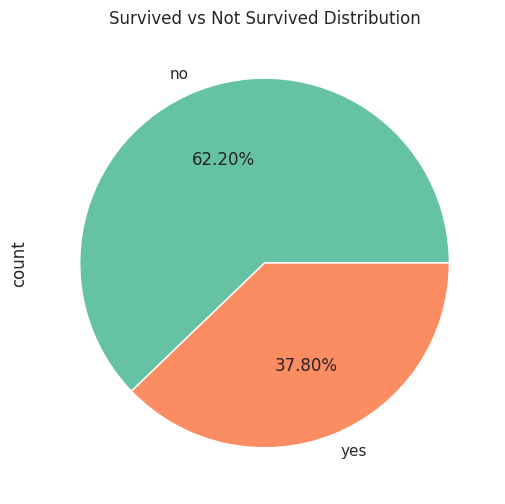

In [53]:
plt.figure(figsize=(6,6))
df['survived'].value_counts().plot(kind='pie', autopct='%.2f%%', labels=['no', 'yes'])
plt.title('Survived vs Not Survived Distribution')
plt.show()

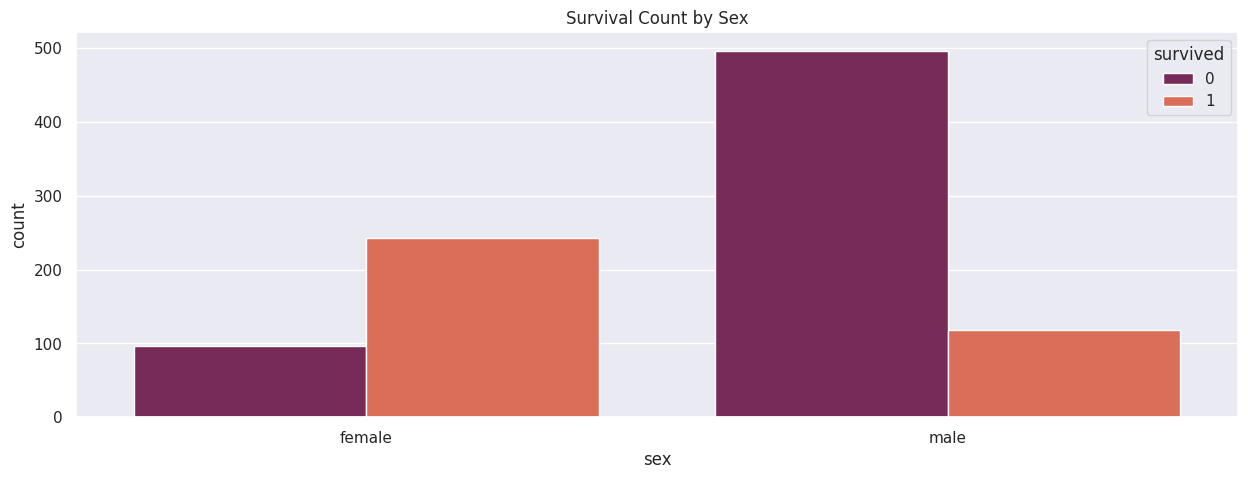

In [54]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='sex', hue='survived', palette='rocket')
plt.title('Survival Count by Sex')
plt.show()

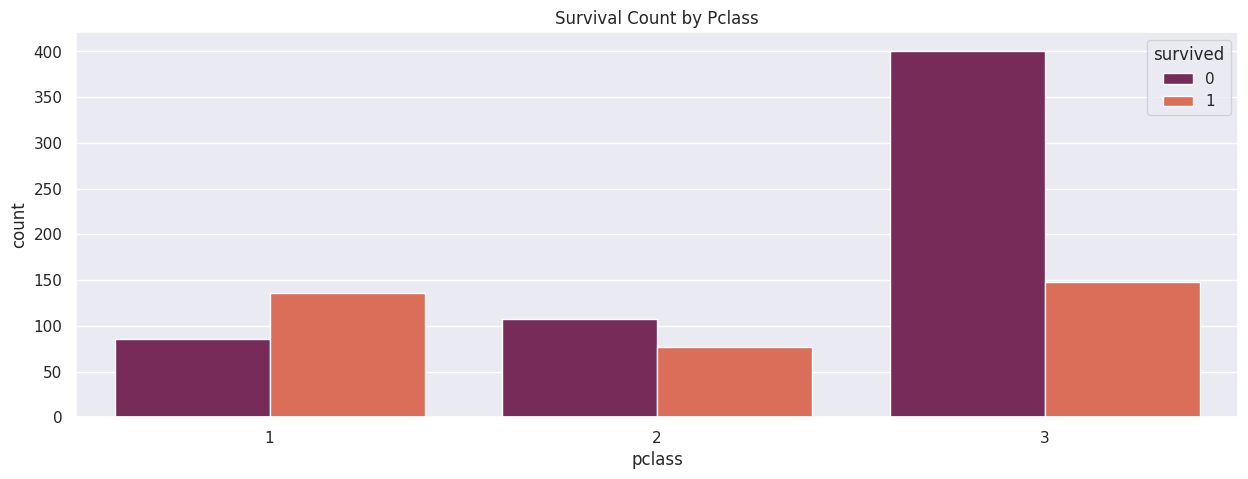

In [55]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='pclass', hue='survived', palette='rocket')
plt.title('Survival Count by Pclass')
plt.show()

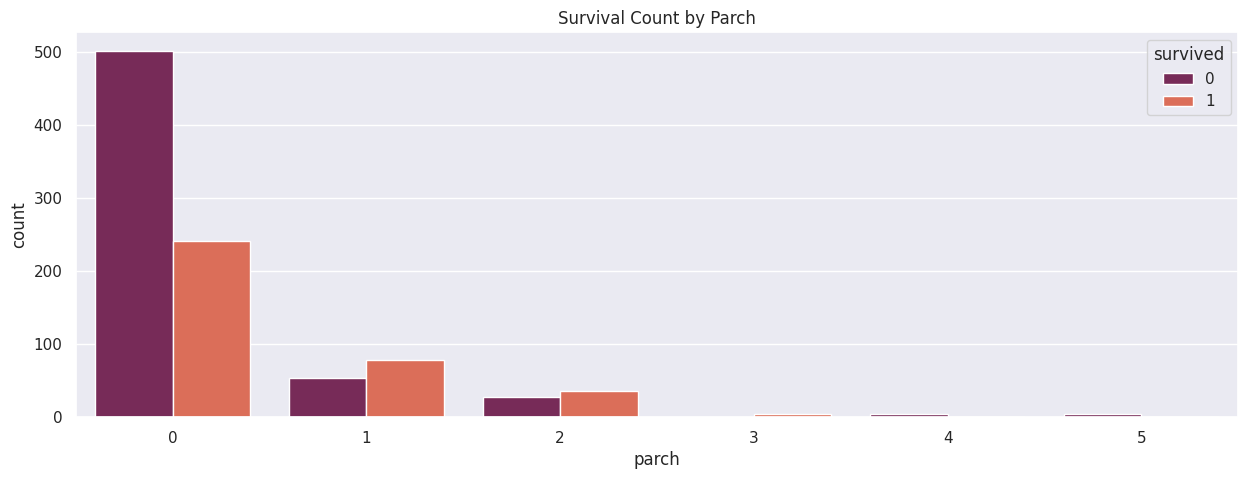

In [56]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='parch', hue='survived', palette='rocket')
plt.title('Survival Count by Parch')
plt.show()

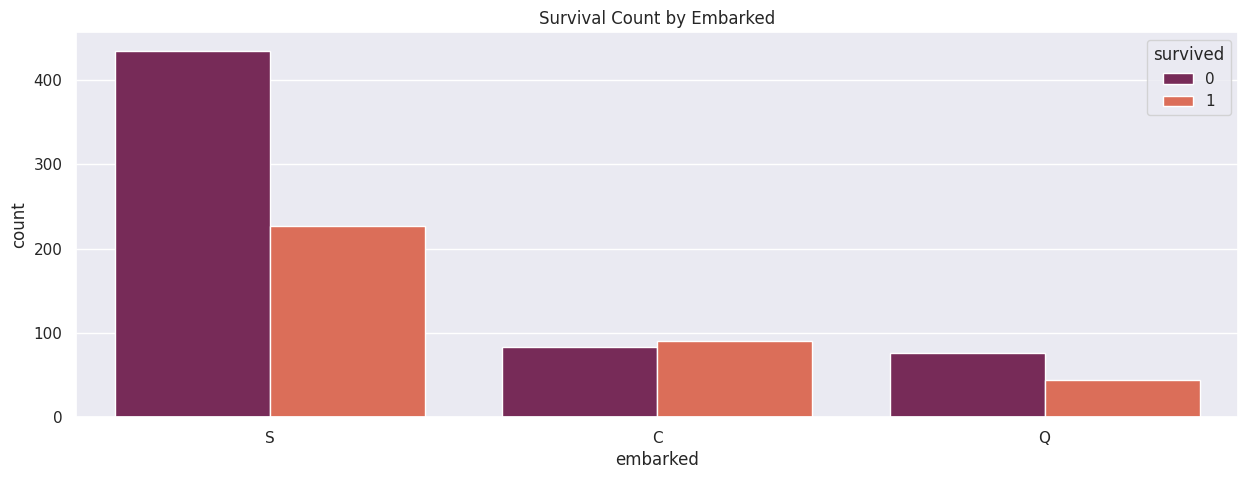

In [57]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='embarked', hue='survived', palette='rocket')
plt.title('Survival Count by Embarked')
plt.show()

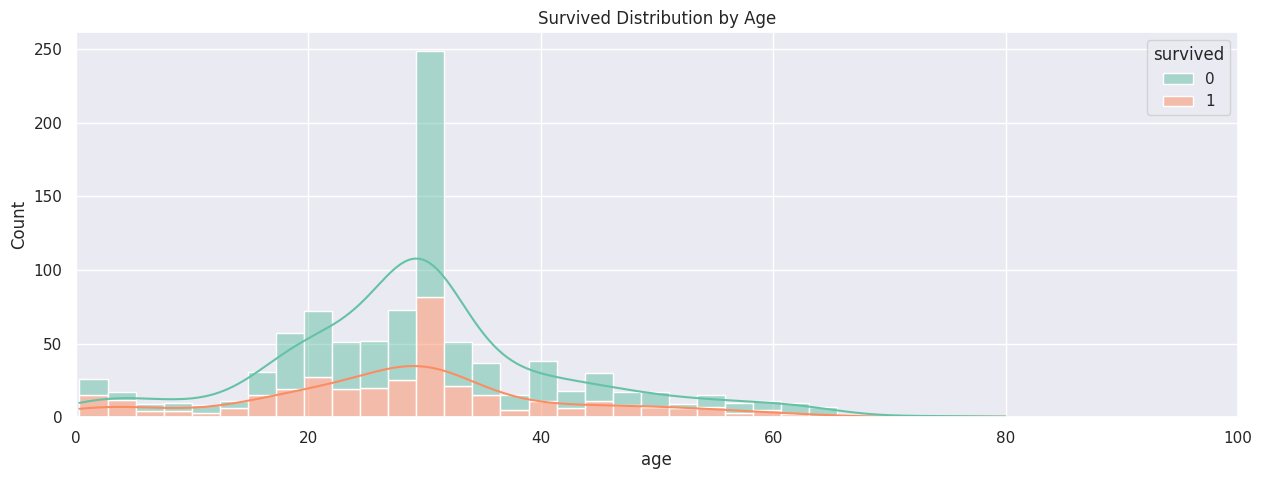

In [58]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x='age', hue='survived', multiple='stack',kde=True)
plt.title('Survived Distribution by Age')
plt.xlim(0,100)
plt.show()

## Data Preprocessing Part 2

In [59]:
# filter columns that have the object data type
for col in df:
  if df[col].dtypes == 'object':
    print(f'{col} : {df[col].unique()}')

sex : ['female' 'male']
embarked : ['S' 'C' 'Q']


In [60]:
# label encoding
from sklearn.preprocessing import LabelEncoder

var = ['sex', 'embarked']
le = LabelEncoder()

for i in var:
    le.fit(df[i].unique())
    df[i]=le.transform(df[i])
    print(i,df[i].unique())

sex [0 1]
embarked [2 0 1]


In [61]:
df.sample(5)

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived
589,2,0,29.000000,0,2,29103.0,23.0000,2,1
469,2,0,29.881138,0,0,226593.0,12.3500,1,1
440,2,0,48.000000,1,2,220845.0,65.0000,2,1
916,3,0,4.000000,0,1,349256.0,13.4167,0,1
128,1,1,47.000000,0,0,111320.0,38.5000,2,0


In [62]:
# normalize the continuous variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[['ticket', 'fare']] = scaler.fit_transform(df[['ticket', 'fare']])

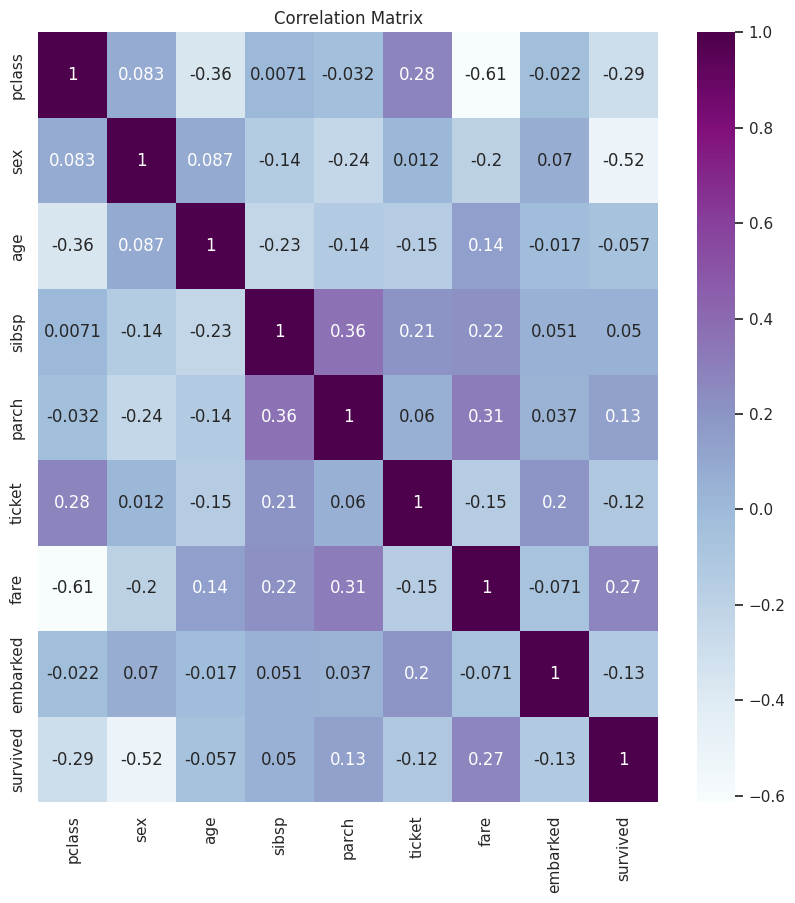

In [63]:
# correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='BuPu')
plt.title('Correlation Matrix')
plt.show()

In [64]:
X = df.drop('survived', axis=1)
y = df['survived']

In [65]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
len(X_train.columns)

8

to predict whether the titanic people survived or not i will use the ANN model

In [71]:
import tensorflow as tf
from tensorflow import keras

# define the ANN model
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(8,), activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# fitting the model
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
24/24 [==============================] - 1s 4ms/step - loss: 1.5803 - accuracy: 0.5157
Epoch 2/10
24/24 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5929
Epoch 3/10
24/24 [==============================] - 0s 2ms/step - loss: 0.6286 - accuracy: 0.6453
Epoch 4/10
24/24 [==============================] - 0s 2ms/step - loss: 0.6031 - accuracy: 0.6662
Epoch 5/10
24/24 [==============================] - 0s 2ms/step - loss: 0.5886 - accuracy: 0.6859
Epoch 6/10
24/24 [==============================] - 0s 2ms/step - loss: 0.5694 - accuracy: 0.6963
Epoch 7/10
24/24 [==============================] - 0s 2ms/step - loss: 0.5642 - accuracy: 0.7055
Epoch 8/10
24/24 [==============================] - 0s 3ms/step - loss: 0.5504 - accuracy: 0.7160
Epoch 9/10
24/24 [==============================] - 0s 2ms/step - loss: 0.5396 - accuracy: 0.7474
Epoch 10/10
24/24 [==============================] - 0s 2ms/step - loss: 0.5332 - accuracy: 0.7421


In [90]:
# evaluate the model
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 6ms/step - loss: 0.5317 - accuracy: 0.7801


[0.5317214131355286, 0.7801046967506409]

In [91]:
# do a predict and show 5 result the predict
yp = model.predict(X_test)
yp[:5]

6/6 [==============================] - 0s 2ms/step


array([[0.59424615],
       [0.7199342 ],
       [0.21613458],
       [0.4685506 ],
       [0.22969034]], dtype=float32)

In [92]:
# filtering where val < 0.5 convert to 0 and else convert to 1
y_pred = []
for i in yp:
  if i < 0.5:
    y_pred.append(0)
  else:
    y_pred.append(1)

In [93]:
# show 5 pred result
y_pred[:5]

[1, 1, 0, 0, 0]

In [94]:
# show 5 the test result
y_test[:5]

293     1
626     0
976     0
1044    1
571     0
Name: survived, dtype: int64

of the 5 samples we took, it can be seen that only 3 predictions were correct for the 5 samples taken

## Model Evaluation

In [84]:
# classification report
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       113
           1       0.82      0.59      0.69        78

    accuracy                           0.78       191
   macro avg       0.79      0.75      0.76       191
weighted avg       0.79      0.78      0.77       191



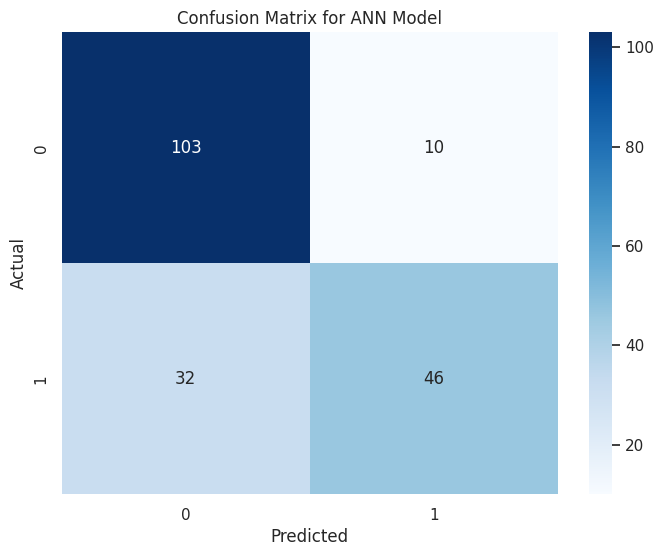

In [83]:
# confusion metrix heatmap
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for ANN Model')
plt.show()

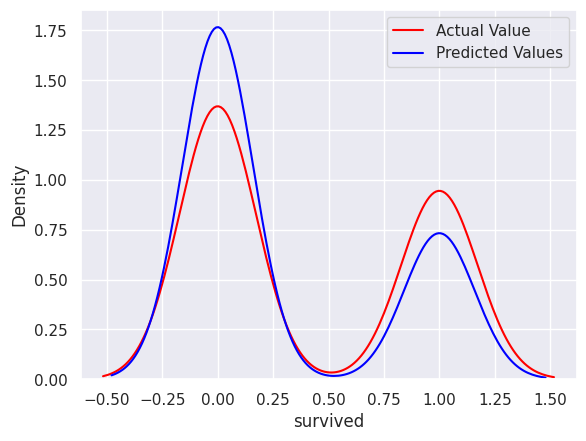

In [95]:
# distribution plot
ax = sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_pred, hist=False, color='b', label='Predicted Values' , ax=ax)
plt.legend()